Metric Plots

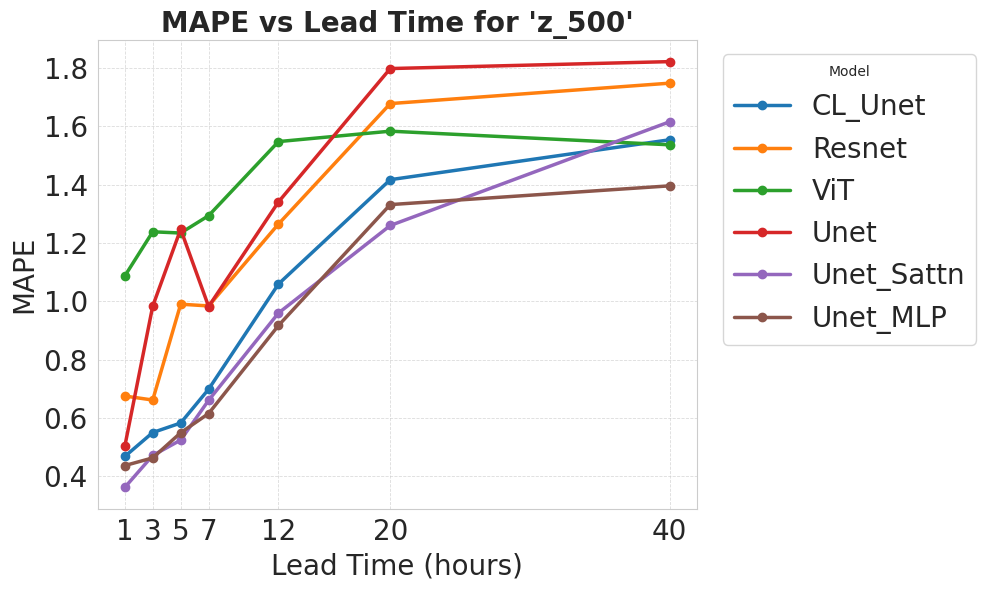

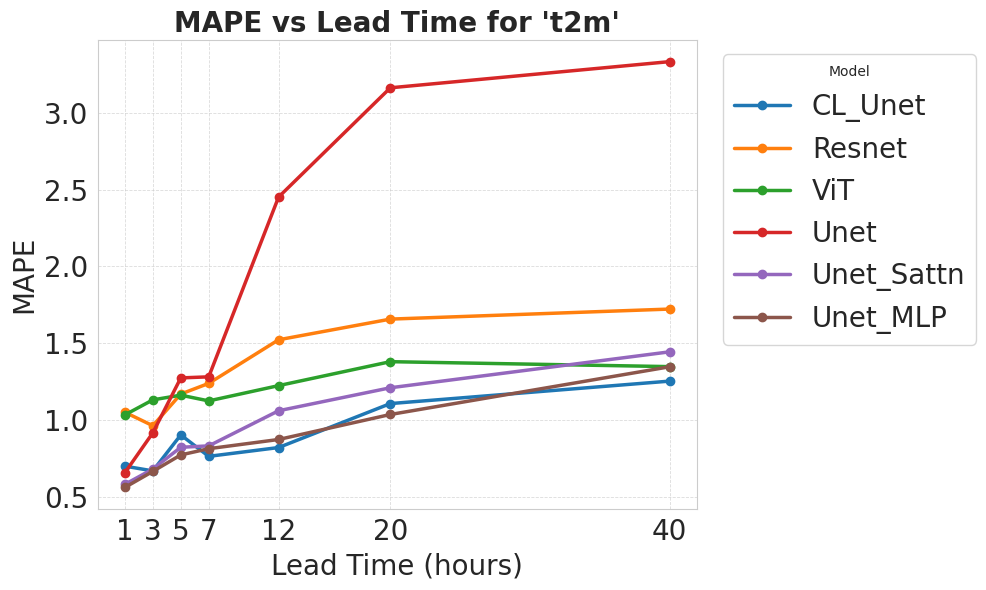

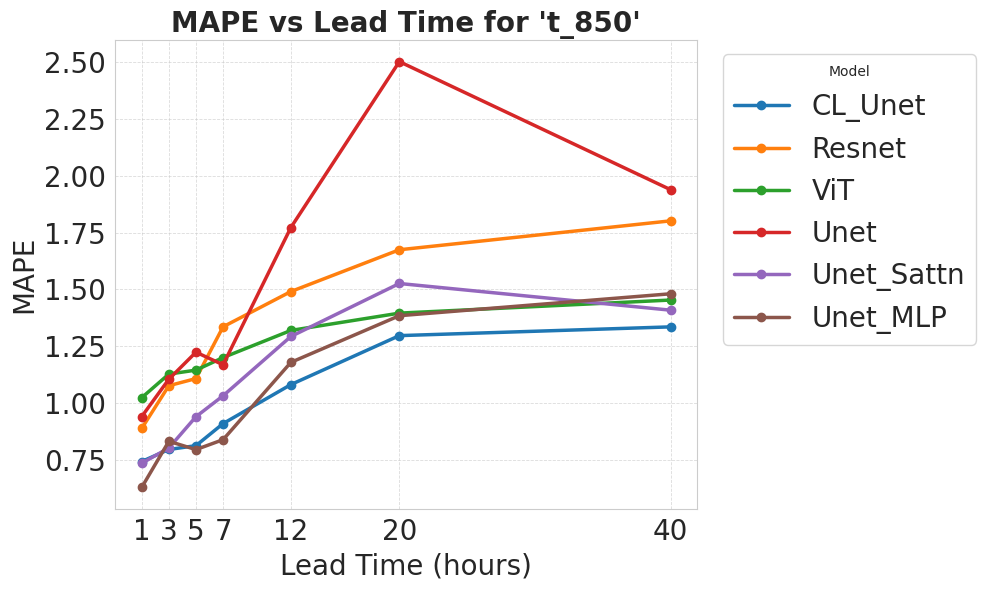

In [ ]:
import json
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Set seaborn styling directly
sns.set_style("whitegrid")
sns.set_palette("tab10")  # Consistent colors

json_files = [
    "/home/tushar/Weather Prediction/Code/Main Model/CL_Unet_Direct_Forecasting_result.json",
    "/home/tushar/Weather Prediction/Code/Main Model/Resnet_Direct_Forecasting_result.json",
    "/home/tushar/Weather Prediction/Code/Main Model/ViT_Direct_Forecasting_result.json",
    "/home/tushar/Weather Prediction/Code/Main Model/Unet_Direct_Forecasting_result.json",
    "/home/tushar/Weather Prediction/Code/Main Model/Unet_sattn_Direct_Forecasting_result.json",
    "/home/tushar/Weather Prediction/Code/Main Model/Unet_MLP_Direct_Forecasting_result.json",
]

model_names = [
    "CL_Unet", "Resnet", "ViT", "Unet", "Unet_Sattn", "Unet_MLP"
]

fixed_vars = ["z_500", "t2m", "t_850"]
fixed_metric = "mape"  # Change this to "rmse", "mape", or "acc" as needed
dicti = {
    "rmse": "RMSE",
    "mape": "MAPE",
    "acc": "ACC",
    "weighted_rmse": "LWRMSE",
}

model_data = {}
for file_path, model_name in zip(json_files, model_names):
    with open(file_path, "r") as f:
        json_data = json.load(f)
    for entry in json_data:
        for fixed_var in fixed_vars:
            if entry['pred_var'] == fixed_var:
                for metric in entry['metrics_per_step']:
                    lead_time = metric['lead_time']
                    metric_value = metric.get(fixed_metric)
                    if model_name not in model_data:
                        model_data[model_name] = {}
                    if lead_time in {1, 3, 5, 7, 12, 20, 40}:
                        if fixed_var not in model_data[model_name]:
                            model_data[model_name][fixed_var] = {}
                        model_data[model_name][fixed_var][lead_time] = metric_value

# Output directory
output_dir = "plots"
os.makedirs(output_dir, exist_ok=True)

# Plotting
for fixed_var in fixed_vars:
    plt.figure(figsize=(10, 6))
    for model_name, lead_dict in model_data.items():
        if fixed_var in lead_dict:
            lead_times = sorted(lead_dict[fixed_var].keys())
            values = [lead_dict[fixed_var][lt] for lt in lead_times]
            plt.plot(
                lead_times,
                values,
                marker='o',
                linewidth=2.5,
                markersize=6,
                label=model_name
            )

    # Styling
    plt.title(f"{dicti[fixed_metric]} vs Lead Time for '{fixed_var}'", fontsize=20, fontweight='bold')
    plt.xlabel("Lead Time (hours)", fontsize=20)
    plt.ylabel(dicti[fixed_metric], fontsize=20)
    plt.xticks(lead_times, fontsize=20)
    plt.yticks(fontsize=20)
    plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.7)
    plt.legend(title="Model", bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=20)
    plt.tight_layout()
    save_path = os.path.join(output_dir, f"{fixed_var}_{fixed_metric}.png")
    # plt.savefig(save_path, dpi=300)
    plt.show()
    plt.close()


Batch-Wise Inference Plot

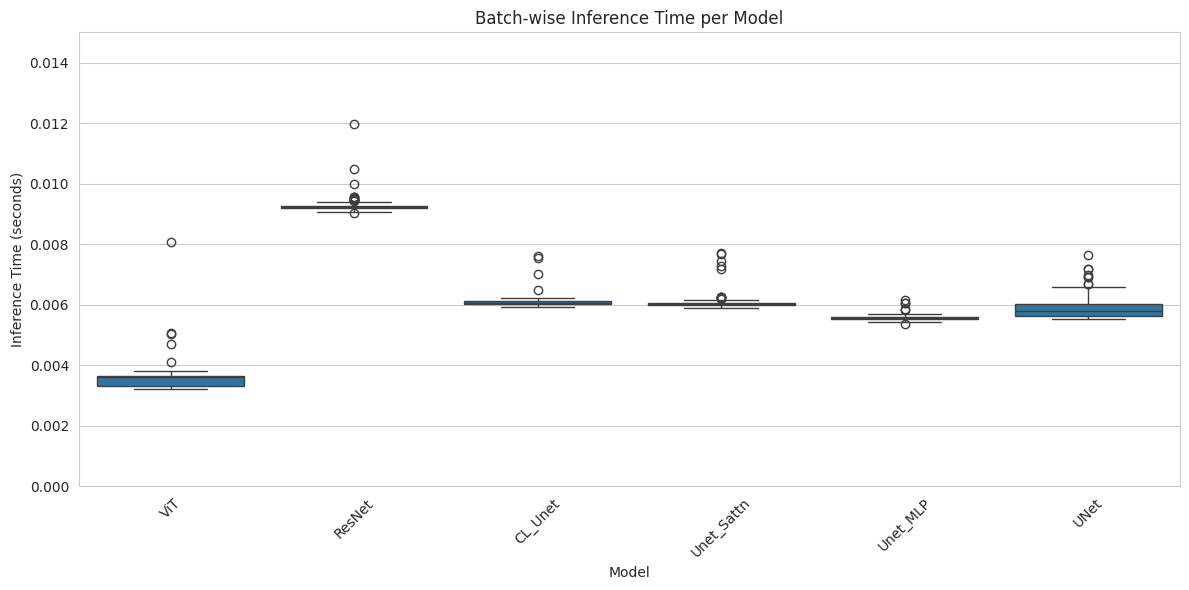

In [11]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the JSON file
with open('params_inference.json', 'r') as f:
    data = json.load(f)

# Prepare data for plotting
records = []
for model in data['models']:
    model_name = model['model_name']
    for t in model['batch_inference_times']:
        records.append({'Model': model_name, 'Inference Time (s)': t})

df = pd.DataFrame(records)

# Plot boxplot with zoomed y-axis
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Inference Time (s)', data=df, showfliers=True)
plt.title('Batch-wise Inference Time per Model')
plt.xlabel('Model')
plt.ylabel('Inference Time (seconds)')

# Adjust y-axis for zoom (change limits as needed for your data)
plt.ylim(0, 0.015)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
